In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.preprocessing import scale

# Read the data

In [2]:
df = pd.read_csv('/Users/zhouxiaomin/Desktop/hkust/COURSES NOTE/2021F/AI/Assignment 1/raw_data/application_train.csv')

In [3]:
df.shape

(307511, 122)

In [4]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Processing

## 1. Imputation of missing data

In [5]:
# num of missing data
missing=df.isnull().sum().reset_index().rename(columns={0:'missNum'})
# missrate
missing['missRate']=missing['missNum']/df.shape[0]
# miss_analy
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)

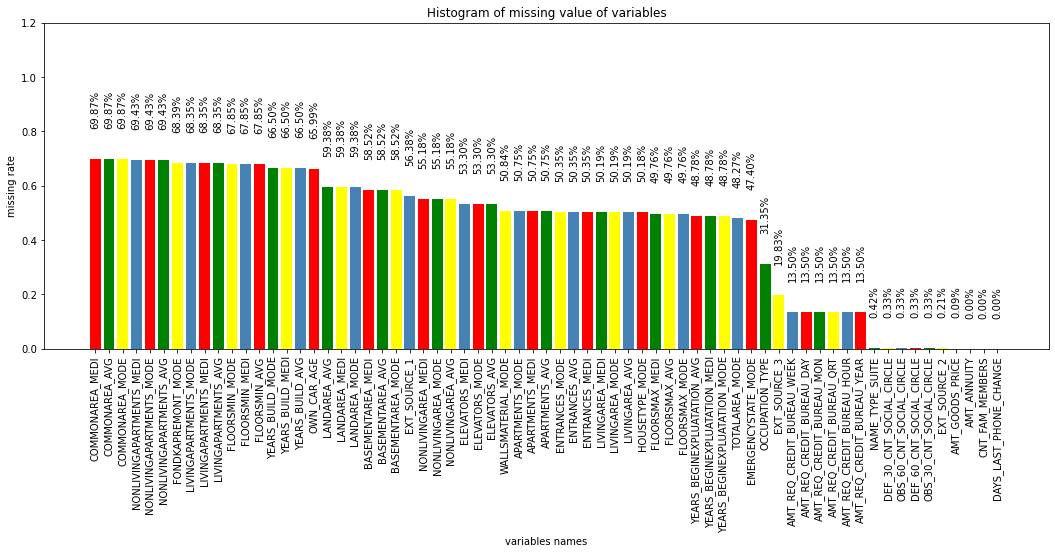

In [6]:
fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
# add x label
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
# plot num
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])
    
plt.show()

In [7]:
# Remove the variables with missing data

df = df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,State servant,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,Commercial associate,...,0,0,1,0,0,0,0,0,0,0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,State servant,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,Working,...,0,0,0,0,0,0,0,0,0,0


## 2. Remove irrelevant variables

In [8]:
# Remove "Flag_Doucments_XX"
datanew=df.iloc[:,1:35]
datanew.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,...,1,MONDAY,11,0,0,0,0,0,0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,...,2,MONDAY,9,0,0,0,0,0,0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,...,2,THURSDAY,11,0,0,0,0,1,1,Religion


## 3. Encode categorical variables

In [9]:
datanew.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [10]:
#Number of categories of each variable
datanew.select_dtypes('object').apply(pd.Series.nunique,axis=0)  

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [11]:
#Remove 'ORGANIZATION_TYPE' since it has too many categories
datanew=datanew.drop('ORGANIZATION_TYPE',axis=1)

In [12]:
for col in datanew.columns:
    if datanew[col].dtype == 'object':
        if len(list(datanew[col].unique())) <= 2:           
            datanew[col] = datanew[col].factorize()[0]

In [13]:
# One hot encoding
datanew = pd.get_dummies(datanew)

In [14]:
datanew.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,1,0,0,0,0,202500.0,406597.5,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,270000.0,1293502.5,0.003541,-16765,-1188,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,67500.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,135000.0,312682.5,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,121500.0,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,1,0,0


## 4. Deal with outliers

In [15]:
# The value of "DAYS_EMPLOYED" should be negative
datanew['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:title={'center':'DAYS_EMPLOYED HISTOGRAM'}, ylabel='Frequency'>

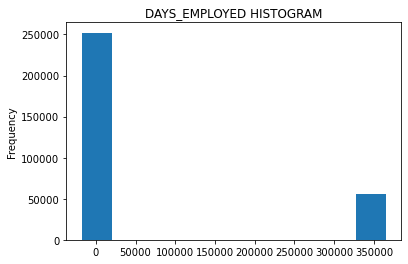

In [16]:
datanew['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED HISTOGRAM')

Text(0.5, 0, 'Days Employment')

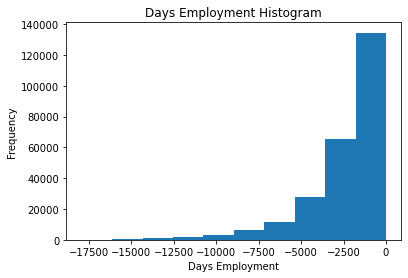

In [17]:
# The 
datanew['DAYS_EMPLOYED_ANOM'] = datanew['DAYS_EMPLOYED'] == 365243  ##Indicator
datanew['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True) 
datanew['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [18]:
datanew=datanew.drop('DAYS_EMPLOYED_ANOM',axis=1) 

## 5. Data transformation

In [19]:
# Convert "DAYS_REGISTRATION""DAYS_ID_PUBLISH""DAYS_EMPLOYED""DAYS_BIRTH" to positive values in years
datanew['DAYS_BIRTH'] = datanew['DAYS_BIRTH'].abs() / 365
datanew['DAYS_EMPLOYED'] = datanew['DAYS_EMPLOYED'].abs() / 365
datanew['DAYS_REGISTRATION'] = datanew['DAYS_REGISTRATION'].abs() / 365
datanew['DAYS_ID_PUBLISH'] = datanew['DAYS_ID_PUBLISH'].abs() / 365

In [20]:
datanew['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [21]:
datanew['DAYS_REGISTRATION'].describe()

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

In [22]:
datanew['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

In [23]:
datafinal = datanew.fillna(0)

In [24]:
datafinal.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,1,0,0,0,0,202500.0,406597.5,0.018801,25.920548,1.745205,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,270000.0,1293502.5,0.003541,45.931507,3.254795,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,67500.0,135000.0,0.010032,52.180822,0.616438,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,135000.0,312682.5,0.008019,52.068493,8.326027,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,121500.0,513000.0,0.028663,54.608219,8.323288,...,0,0,0,0,0,0,0,1,0,0


In [25]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                                 307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int64  
 3   FLAG_OWN_REALTY                                    307511 non-null  int64  
 4   CNT_CHILDREN                                       307511 non-null  int64  
 5   AMT_INCOME_TOTAL                                   307511 non-null  float64
 6   AMT_CREDIT                                         307511 non-null  float64
 7   REGION_POPULATION_RELATIVE                         307511 non-null  float64
 8   DAYS_BIRTH                                         307511 non-null  float6

# Training set & Test set

In [26]:
y = datafinal.TARGET
X = datafinal.drop(['TARGET'], axis=1)

In [27]:
#Split dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# LDA

In [28]:
lda = LinearDiscriminantAnalysis(solver='svd')
y_lda = lda.fit(scale(X_train), y_train).predict(scale(X_test))

df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_lda})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,84909,7337
Yes,5,3


In [29]:
cm = confusion_matrix( y_test, y_lda)
print(cm.T)

[[84909  7337]
 [    5     3]]


In [30]:
def plot_confusion_matrix(cm, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix')
    plt.colorbar()
    plt.tight_layout()
    plt.xlabel('True label',rotation='horizontal', ha='right')
    plt.ylabel('Predicted label')
    plt.show()

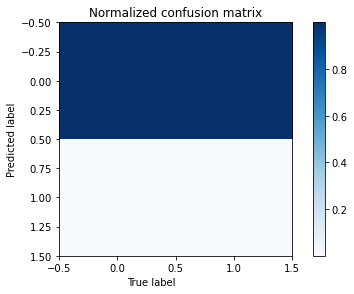

In [31]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized.T)

In [32]:
print(cm.T)
print(classification_report(y_test, y_lda, target_names=['No', 'Yes'], digits=3))

[[84909  7337]
 [    5     3]]
              precision    recall  f1-score   support

          No      0.920     1.000     0.959     84914
         Yes      0.375     0.000     0.001      7340

    accuracy                          0.920     92254
   macro avg      0.648     0.500     0.480     92254
weighted avg      0.877     0.920     0.882     92254



In [34]:
#Instead of using the probability of 50% as decision boundary, we say that a probability of default of 25% is to be classified as 'Yes'.
decision_prob = 0.25
y_prob = lda.fit(scale(X_train), y_train).predict_proba(scale(X_test))
df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob[:,1] > decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,84421,7190
Yes,493,150


In [35]:
# Check confusion matrix 
cm = confusion_matrix(y_test, y_prob[:,1] > decision_prob)
print(cm.T)

[[84421  7190]
 [  493   150]]


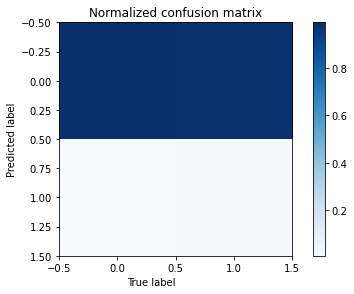

In [36]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized.T)

In [38]:
print(classification_report(y_test, y_prob[:,1] > decision_prob, target_names=['No', 'Yes'], digits=3))

              precision    recall  f1-score   support

          No      0.922     0.994     0.956     84914
         Yes      0.233     0.020     0.038      7340

    accuracy                          0.917     92254
   macro avg      0.577     0.507     0.497     92254
weighted avg      0.867     0.917     0.883     92254



# LASSO

In [39]:
lasso = skl_lm.LogisticRegression(penalty='l1', C=0.1,solver='liblinear')   
lasso.fit(scale(X_train), y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [40]:
y_lasso = lasso.predict(scale(X_test))

In [41]:
df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_lasso})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,84914,7340


In [42]:
cm = confusion_matrix( y_test, y_lasso)
print(cm.T)

[[84914  7340]
 [    0     0]]


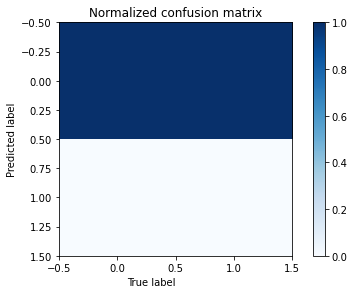

In [43]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized.T)

In [44]:
y_lasso_prob=lasso.predict_proba(scale(X_test))

In [45]:
cm_df = pd.DataFrame({'True': y_test, 'Pred': y_lasso_prob[:,1] > .25})
cm_df.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, y_lasso_prob[:,1]> .25, target_names=['No', 'Yes'], digits=3))

Pred     No  Yes
True            
0     84554  360
1      7220  120
              precision    recall  f1-score   support

          No      0.921     0.996     0.957     84914
         Yes      0.250     0.016     0.031      7340

    accuracy                          0.918     92254
   macro avg      0.586     0.506     0.494     92254
weighted avg      0.868     0.918     0.883     92254



In [46]:
pd.DataFrame(lasso.coef_).T.set_index(X_train.columns).rename(columns={0:'Lasso_Coefficient'}).head(20)
# Some of the coefficients are now reduced to exactly zero.

,Lasso_Coefficient
NAME_CONTRACT_TYPE,-0.163518
FLAG_OWN_CAR,-0.145647
FLAG_OWN_REALTY,-0.025737
CNT_CHILDREN,0.012348
AMT_INCOME_TOTAL,0.023237
AMT_CREDIT,-0.053047
REGION_POPULATION_RELATIVE,-0.005892
DAYS_BIRTH,-0.158645
DAYS_EMPLOYED,-0.238217
DAYS_REGISTRATION,-0.058748


# Ridge

In [47]:
ridge = skl_lm.LogisticRegression(penalty='l2', C=0.1)   # l1 = Lasso / l2 = Ridge. 
y_ridge=ridge.fit(scale(X_train), y_train).predict(scale(X_test))

In [48]:
df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_ridge})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,84914,7340


In [49]:
y_ridge_prob=ridge.predict_proba(scale(X_test))

In [50]:
cm_df = pd.DataFrame({'True': y_test, 'Pred': y_ridge_prob[:,1] > .25})
cm_df.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, y_ridge_prob[:,1]> .25, target_names=['No', 'Yes'], digits=3))

Pred     No  Yes
True            
0     84543  371
1      7219  121
              precision    recall  f1-score   support

          No      0.921     0.996     0.957     84914
         Yes      0.246     0.016     0.031      7340

    accuracy                          0.918     92254
   macro avg      0.584     0.506     0.494     92254
weighted avg      0.868     0.918     0.883     92254



In [51]:
pd.DataFrame(ridge.coef_).T.set_index(X_train.columns).rename(columns={0:'Ridge_Coefficient'}).head(20)

,Ridge_Coefficient
NAME_CONTRACT_TYPE,-0.164660
FLAG_OWN_CAR,-0.146597
FLAG_OWN_REALTY,-0.026652
CNT_CHILDREN,0.012958
AMT_INCOME_TOTAL,0.028046
AMT_CREDIT,-0.054089
REGION_POPULATION_RELATIVE,-0.006369
DAYS_BIRTH,-0.158262
DAYS_EMPLOYED,-0.239486
DAYS_REGISTRATION,-0.059235


## ROC

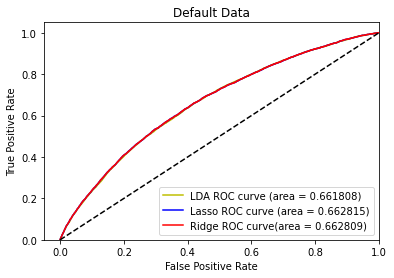

In [52]:
# ROC curve of LDA
false_pos_rate1, true_pos_rate1, _ = roc_curve(y_test, y_prob[:,1])
roc_auc1 = auc(false_pos_rate1, true_pos_rate1)


# ROC curve of Lasso
false_pos_rate2, true_pos_rate2, _ = roc_curve(y_test, y_lasso_prob[:,1])
roc_auc2 = auc(false_pos_rate2, true_pos_rate2)

# ROC curve of Ridge
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_ridge_prob[:,1])
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

fig, ax = plt.subplots()

ax.plot(false_pos_rate1, true_pos_rate1, label='LDA ROC curve (area = %0.6f)' % roc_auc1, color='y')
ax.plot(false_pos_rate2, true_pos_rate2, label='Lasso ROC curve (area = %0.6f)' % roc_auc2, color='b')
ax.plot(false_pos_rate3, true_pos_rate3, label='Ridge ROC curve(area = %0.6f)' % roc_auc3, color='r')
ax.set_title('Default Data')


for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
   
    ax.legend(loc="lower right")